### Import libraries

In [1]:
import sys
import numpy as np
import tensorflow as tf
import librosa
import librosa.display
import os
from IPython.display import Audio, display
import matplotlib.pyplot as plt
%matplotlib inline

### Load Audio File

In [2]:
def load_audio(path):
    display(Audio(path))

### Convert Audio to Spectogram

In [3]:
# Reads wav file and produces spectrum
def convert_audio_to_spectogram(filename):
    FFT_WINDOW_SIZE = 2048
    CLIP_SIZE = 400
    x, fs = librosa.load(filename)
    S = librosa.stft(x, FFT_WINDOW_SIZE)
    S = np.log1p(np.abs(S[:,:CLIP_SIZE]))  
    return S,fs

### Plot spectrogram

In [4]:
def plot_spectogram(images_list):
    Y_AXIS_TRIM = 250
    X_AXIS_TRIM = 300
    IMG_WIDTH = 20
    IMG_HEIGHT = 20
    MAX_PER_ROW =2

    
    
    i = 0
    
    MAX_PER_ROW = min(MAX_PER_ROW, len(images_list))
    
    while i < len(images_list):
        plt.figure(figsize=(IMG_WIDTH, IMG_HEIGHT))
        for j in range(MAX_PER_ROW):
            plt.subplot(1, MAX_PER_ROW, j+1)
            plt.title(images_list[i+ j]["name"])
            plt.imshow(images_list[i+j]["data"][:Y_AXIS_TRIM,:X_AXIS_TRIM])
            plt.gca().invert_yaxis()
        plt.show()
        i+=MAX_PER_ROW
        
def plot_spectogram_with_amplitude(images_list):
    Y_AXIS_TRIM = 250
    X_AXIS_TRIM = 300
    IMG_WIDTH = 20
    IMG_HEIGHT = 20
    MAX_PER_ROW =2

    
    
    i = 0
    
    MAX_PER_ROW = min(MAX_PER_ROW, len(images_list))
    
    while i < len(images_list):
        plt.figure(figsize=(IMG_WIDTH, IMG_HEIGHT))
        for j in range(MAX_PER_ROW):
            plt.subplot(1, MAX_PER_ROW, j+1)
            librosa.display.specshow(librosa.amplitude_to_db(images_list[i+j]["data"][:Y_AXIS_TRIM,:X_AXIS_TRIM], ref=np.max), y_axis='log', x_axis='time')
            plt.title('Power spectrogram'+images_list[i+ j]["name"])
            plt.colorbar(format='%+2.0f dB')
            plt.tight_layout()
        plt.show()
        i+=MAX_PER_ROW    
        
        

### Hyper Paramater Alpha Tuning

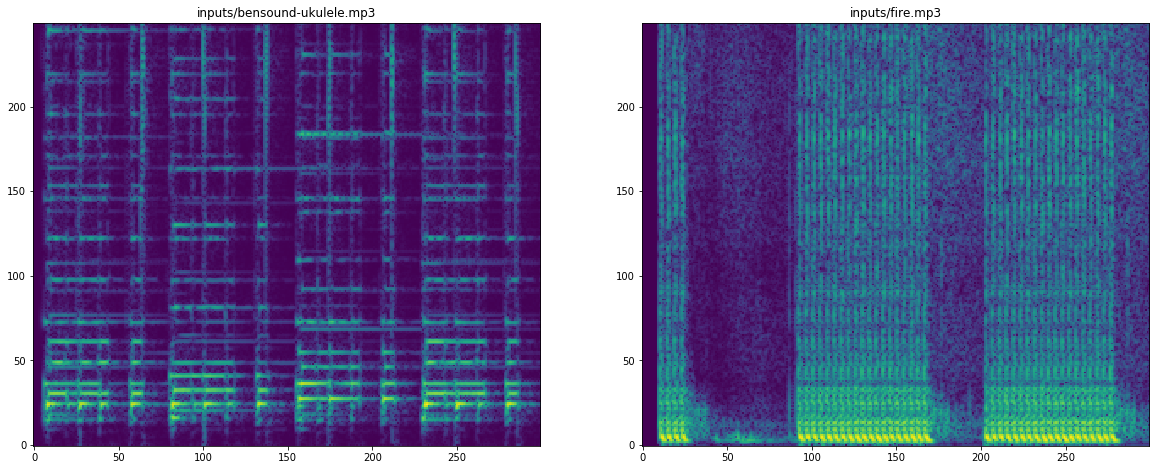

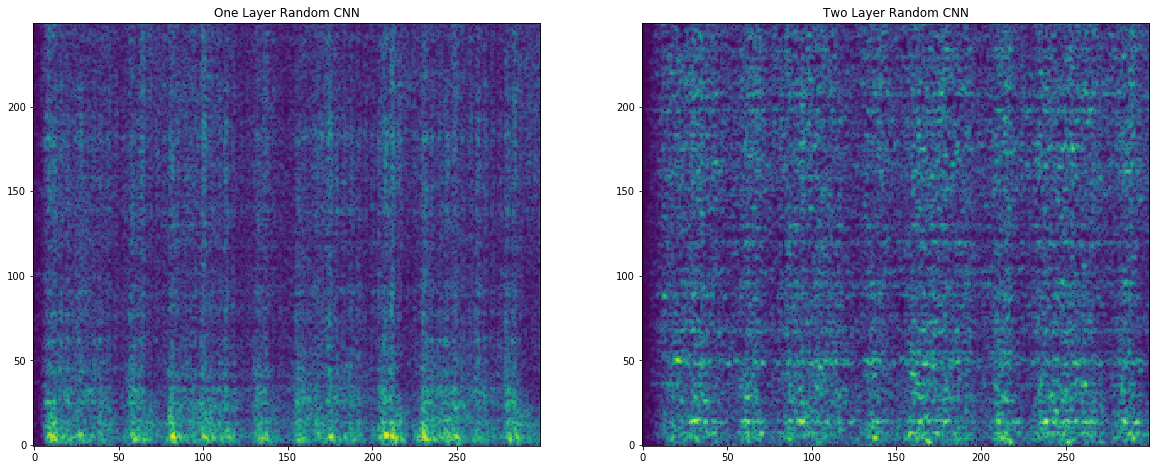

In [6]:
CONTENT_FILENAME = "inputs/bensound-ukulele.mp3"
STYLE_FILENAME = "inputs/fire.mp3"

a_content,fs = convert_audio_to_spectogram(CONTENT_FILENAME)
a_style, fs = convert_audio_to_spectogram(STYLE_FILENAME)

plot_spectogram([
    {
        "name":"inputs/bensound-ukulele.mp3",
         "data": a_content
    },
    {
        "name":"inputs/fire.mp3",
        "data": a_style
    }])


# alpha_list=[0.001, 0.006, 0.01, 0.1]
# results=[]


# for alpha in alpha_list:
#     file_name = "final-results/alpha/final-piano"+str(alpha)+".mp3"
#     print "Alpha", alpha
#     load_audio(file_name)
#     a_result,fs = convert_audio_to_spectogram(file_name)
#     results.append({"name":"Result "+str(alpha),
#             "data": a_result});
    
# plot_spectogram(results)


CONTENT_FILENAME = "final-results/one-layer-random/final-ukulele-fire-0.006.mp3"
STYLE_FILENAME = "final-results/two-layer-random/bensound_ukelele_fire_opt_L_BFGS_B_filter_width_11_NFilters1_2048_NFilters2_2048_alpha_0.01_lr_0.001_beta_1.mp3"

a_content,fs = convert_audio_to_spectogram(CONTENT_FILENAME)
a_style, fs = convert_audio_to_spectogram(STYLE_FILENAME)

plot_spectogram([
    {
        "name":"One Layer Random CNN",
         "data": a_content
    },
    {
        "name":"Two Layer Random CNN",
        "data": a_style
    }])


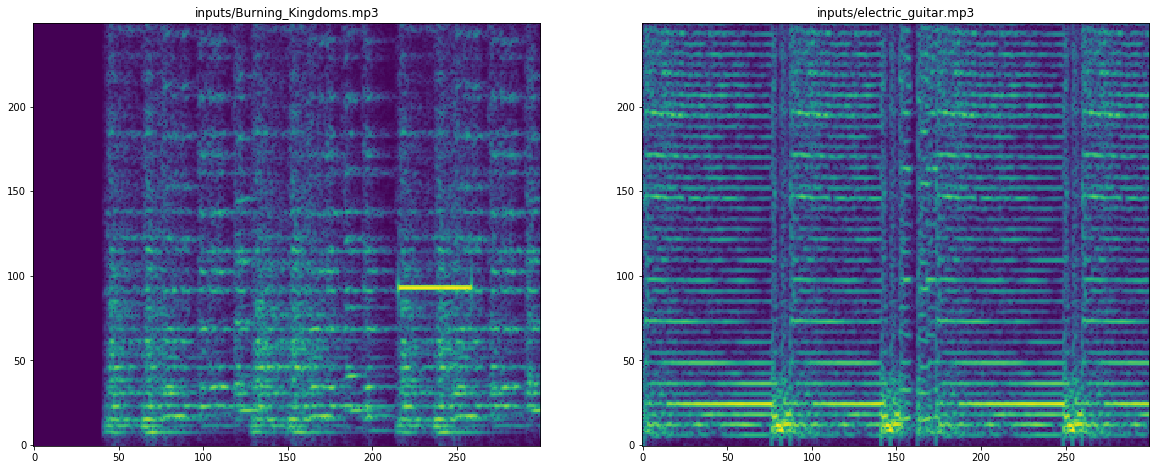

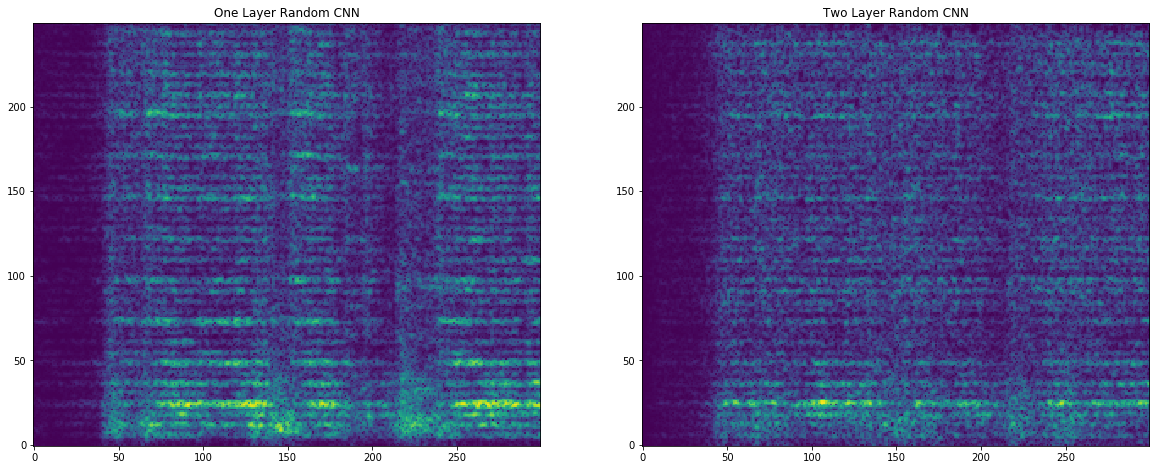

In [8]:
CONTENT_FILENAME = "inputs/Burning_Kingdoms.mp3"
STYLE_FILENAME = "inputs/electric_guitar.mp3"

a_content,fs = convert_audio_to_spectogram(CONTENT_FILENAME)
a_style, fs = convert_audio_to_spectogram(STYLE_FILENAME)

plot_spectogram([
    {
        "name":"inputs/Burning_Kingdoms.mp3",
         "data": a_content
    },
    {
        "name":"inputs/electric_guitar.mp3",
        "data": a_style
    }])


# alpha_list=[0.001, 0.006, 0.01, 0.1]
# results=[]


# for alpha in alpha_list:
#     file_name = "final-results/alpha/final-piano"+str(alpha)+".mp3"
#     print "Alpha", alpha
#     load_audio(file_name)
#     a_result,fs = convert_audio_to_spectogram(file_name)
#     results.append({"name":"Result "+str(alpha),
#             "data": a_result});
    
# plot_spectogram(results)


CONTENT_FILENAME = "final-results/one-layer-random/final-Burning-Kingdoms-guitar-0.006.mp3"
STYLE_FILENAME = "final-results/two-layer-random/Burning_kingdoms_electric_guitar_opt_L_BFGS_B_filter_width_11_NFilters1_2048_NFilters2_2048_alpha_0.01_lr_0.001_beta_1.mp3"

a_content,fs = convert_audio_to_spectogram(CONTENT_FILENAME)
a_style, fs = convert_audio_to_spectogram(STYLE_FILENAME)

plot_spectogram([
    {
        "name":"One Layer Random CNN",
         "data": a_content
    },
    {
        "name":"Two Layer Random CNN",
        "data": a_style
    }])


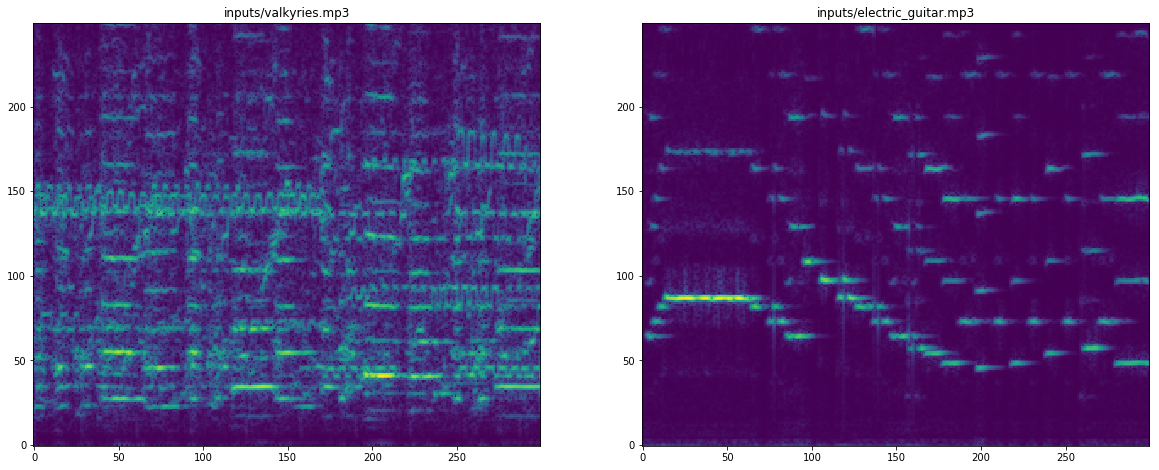

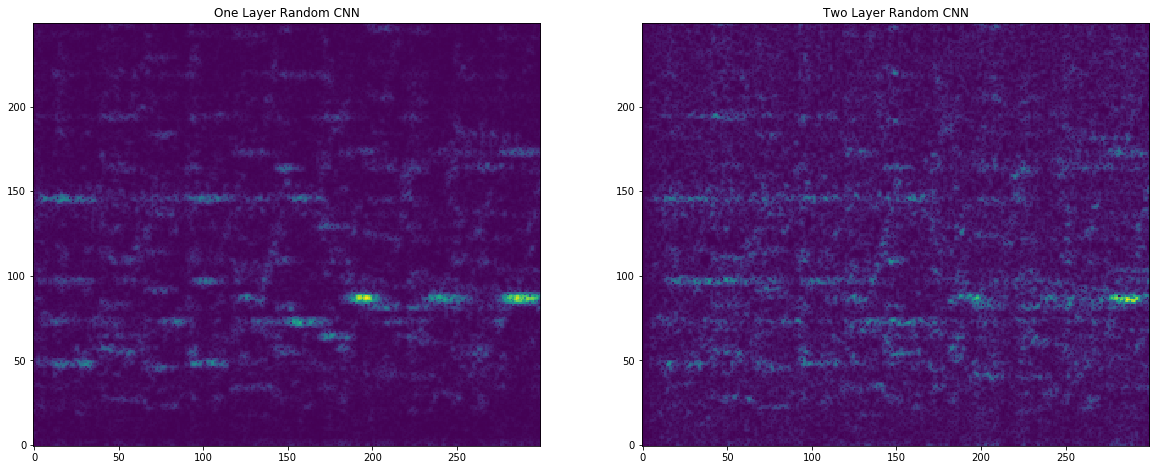

In [9]:
CONTENT_FILENAME = "inputs/valkyries.mp3"
STYLE_FILENAME = "inputs/flute.mp3"

a_content,fs = convert_audio_to_spectogram(CONTENT_FILENAME)
a_style, fs = convert_audio_to_spectogram(STYLE_FILENAME)

plot_spectogram([
    {
        "name":"inputs/valkyries.mp3",
         "data": a_content
    },
    {
        "name":"inputs/electric_guitar.mp3",
        "data": a_style
    }])


# alpha_list=[0.001, 0.006, 0.01, 0.1]
# results=[]


# for alpha in alpha_list:
#     file_name = "final-results/alpha/final-piano"+str(alpha)+".mp3"
#     print "Alpha", alpha
#     load_audio(file_name)
#     a_result,fs = convert_audio_to_spectogram(file_name)
#     results.append({"name":"Result "+str(alpha),
#             "data": a_result});
    
# plot_spectogram(results)


CONTENT_FILENAME = "final-results/one-layer-random/final-valkyries-flute-0.006.mp3"
STYLE_FILENAME = "final-results/two-layer-random/valkyries_flute_opt_L_BFGS_B_filter_width_11_NFilters1_2048_NFilters2_2048_alpha_0.01_lr_0.001_beta_1.mp3"

a_content,fs = convert_audio_to_spectogram(CONTENT_FILENAME)
a_style, fs = convert_audio_to_spectogram(STYLE_FILENAME)

plot_spectogram([
    {
        "name":"One Layer Random CNN",
         "data": a_content
    },
    {
        "name":"Two Layer Random CNN",
        "data": a_style
    }])